# Поиск лучшего мат.преобразования переменных

Функция поиска лучшего математического преобразования для входных переменных. На выбор, можно минимизировать квантильную ассиметрию (робастную к выбросам), ассиметрию и статистику Колмогорова-Смирнова (проверка схожести распределения входной переменной с распределение целевой переменной) О квантильной ассиметрии (SAS Institut):

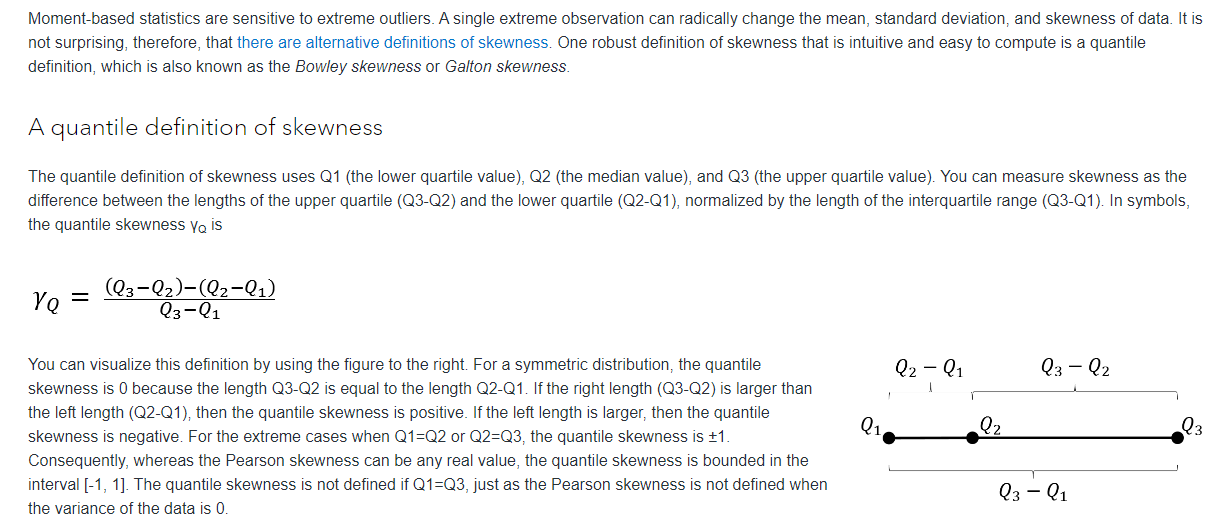

In [143]:
def math(arr,types,target=0):
    
    import numpy as np
    import pandas as pd
    from scipy.stats import ks_2samp
    from scipy.stats import skew 
 
    df_log10=np.log10(arr.astype(float))
    df_log=np.log(arr.astype(float))
    df_inv=1/(arr.astype(float))
    df_sqrt=np.sqrt(arr.astype(float)+1)
    df_inv_sqrt=1/np.sqrt(arr.astype(float)+1)
    df_sq=np.square(arr.astype(float)+1)
    df_inv_sq=1/np.square(arr.astype(float)+1)
    df_st_scaller=(arr.astype(float)-np.mean(arr.astype(float)))/np.std(arr.astype(float))
    df_max_scaller=arr.astype(float)/np.max(arr.astype(float))
    df_arcs=np.arcsin(df_max_scaller)
    df_cub_root=arr.astype(float)**(1/3)
    df_no_transf=arr.astype(float)
    var=[df_log10,df_log,df_inv,df_sqrt,df_inv_sqrt,df_sq,df_inv_sq,df_st_scaller,df_max_scaller,df_arcs,df_cub_root,df_no_transf]
    name=['_log10','_log','_inv','_sqrt','_inv_sqrt','_sq','_inv_sq','_scall','_max_scall','_arcs','_cub_root','_no']
    mini=100000
    maxi=0
    for i in range(12):
        if types=='q_skew':
            metric=((np.quantile(var[i], 0.75)-np.quantile(var[i], 0.5))-(np.quantile(var[i], 0.5)-np.quantile(var[i], 0.25)))/(np.quantile(var[i], 0.75)-np.quantile(var[i], 0.25))
            if mini >= np.absolute(metric):
                mini=np.absolute(metric)
                new=pd.DataFrame({arr.name + name[i]: var[i]})
        elif types=='skew':
            metric=skew(var[i])
            if mini >= np.absolute(metric):
                mini=np.absolute(metric)
                new=pd.DataFrame({arr.name + name[i]: var[i]})
        elif types=='ks_test':
            metric,a=ks_2samp(arr,target)
            if maxi <= metric:
                maxi=metric
                new=pd.DataFrame({arr.name + name[i]: var[i]})
            print(metric)
    return new